<a href="https://colab.research.google.com/github/Ayanlola2002/Data-Science-Nigeria/blob/master/DSN_BOOTCAMP_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
#mounting Gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [171]:
train_df=pd.read_csv('/content/drive/My Drive/DSN_BOOTCAMP/Train.csv')
test_df=pd.read_csv('/content/drive/My Drive/DSN_BOOTCAMP/Test.csv')

In [172]:

train_df.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.000,0.285,1.656,0.000,0.000,0.000,10689720.000,252072.000,4272776.000,11333126.000,4397256.000,2301324.000,7875694.000,96375139,112181765.000,1.000,1.000,1.000,3.000,3.000,134.655,nan,nan,134.655,4000.500,17064.000,11376.000,60.000,17064.000,5962.000,nan,1052.000,8.000,2.000,nan,12.000,12.000,4.000,0.000,nan,nan,0.393,2.020,0.712,0.000,0.000,charge,nan,1.130,0.044,no
1,Apcnt_1000004,3456.000,0.674,0.234,0.000,0.000,0.000,898979.000,497531.000,9073814.000,2533168.000,244292.000,3982971.000,2141445.000,28141427,45169902.000,1.000,1.000,1.000,2.000,2.000,109.230,11385.240,14584.290,86.685,4161.000,13413.000,8942.000,304.000,13413.000,5780.000,nan,2554.000,17.500,0.000,0.000,16.000,24.000,8.000,0.000,nan,nan,0.314,8.080,0.184,nan,0.000,charge,349.806,1.620,0.322,no
2,Apcnt_1000008,3276.000,0.538,3.151,0.000,6.282,nan,956940.000,nan,192944.000,1079864.000,nan,nan,0.000,16576457,22452691.000,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,1597.500,4746.000,3164.000,60.000,15696.000,nan,14508.000,70.000,0.667,0.000,nan,12.000,0.000,6.000,0.000,149.680,nan,0.163,18.180,0.791,0.000,0.000,charge,nan,1.513,0.012,yes
3,Apcnt_1000012,3372.000,0.170,0.505,0.000,0.000,192166.000,3044703.000,385499.000,3986472.000,3621979.000,nan,771776.000,1186839.000,48187375,136297820.000,0.000,0.000,0.000,1.000,1.000,120.120,8580.000,0.000,85.800,1701.000,4014.000,2676.000,60.000,11679.000,nan,nan,522.000,7.833,1.000,1.000,4.000,8.000,4.000,1.000,nan,nan,0.489,2.020,0.685,nan,0.000,charge,89.940,0.664,0.083,no
4,Apcnt_1000016,3370.000,0.773,1.101,0.000,0.000,1556.000,214728.000,214728.000,1284089.000,361770.000,396391.000,818456.000,511535.000,28141427,15292757.000,0.000,0.000,0.000,3.000,3.000,104.535,8360.190,10326.450,115.335,1551.000,3285.000,2190.000,60.000,19437.000,12958.000,5202.000,272.000,1.000,0.000,0.000,24.000,2.000,24.000,0.000,150.013,nan,0.275,12.120,0.438,0.000,0.000,charge,97.888,1.428,0.046,no


In [173]:

print(train_df.shape)
print(test_df.shape)

(56000, 52)
(24000, 51)


In [174]:
train_df.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [175]:
test_df.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.000,0.349,10.201,0.000,0.000,418564.000,418564.000,418564.000,540710.000,0.000,1649749.000,5446.000,0.000,48187375,114686147.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,1086.000,6204.000,2676.000,60.000,14691.000,9794.000,nan,238.000,1.833,0.000,nan,22.000,2.000,14.000,0.000,nan,nan,0.825,1.010,0.800,nan,0.000,charge,nan,0.000,0.011
1,Apcnt_1000048,3284.000,1.274,2.961,9.020,0.000,0.000,9858816.000,49014.000,1510098.000,18308285.000,622789.000,1025793.000,1396510.000,34694910,87479487.000,1.000,1.000,1.000,2.000,2.000,142.560,nan,nan,570.585,3082.500,10221.000,6814.000,60.000,11955.000,3528.000,nan,1216.000,19.500,3.000,nan,30.000,18.000,14.000,2.000,nan,18.841,0.508,4.040,0.623,1.000,0.000,lending,nan,0.505,0.044
2,Apcnt_1000052,nan,0.275,0.060,0.000,0.000,nan,nan,nan,nan,0.000,118256.000,nan,nan,21973443,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,852.000,4836.000,nan,nan,nan,7.833,0.000,nan,2.000,nan,0.000,nan,nan,nan,nan,0.000,nan,nan,nan,charge,nan,0.000,nan
3,Apcnt_1000076,3232.000,0.285,2.803,0.000,0.000,0.000,473802.000,473802.000,1724437.000,493641.000,1391064.000,1176725.000,1220293.000,16576457,nan,2.000,2.000,2.000,3.000,3.000,109.005,13050.000,nan,109.005,1414.500,4197.000,2798.000,60.000,14964.000,nan,nan,248.000,9.000,1.000,1.000,36.000,0.000,26.000,0.000,nan,nan,0.917,2.020,0.464,nan,nan,charge,90.164,0.789,0.104
4,Apcnt_1000080,3466.000,2.095,0.832,2.518,0.000,19839.000,1150662.000,1150662.000,7860523.000,5752921.000,271133.000,613064.000,4779643.000,48187375,72049802.000,0.000,0.000,0.000,3.000,3.000,139.065,469.290,469.290,15.180,2724.000,9855.000,6570.000,182.000,11679.000,5900.000,nan,2388.000,16.667,1.000,0.000,24.000,28.000,20.000,0.000,nan,nan,0.234,23.230,0.727,0.000,0.000,lending,1303.587,1.638,0.163


In [176]:
Application_id=test_df['Applicant_ID']

In [177]:

print(train_df.isnull().any(axis=0).sum())
print(test_df.isnull().any(axis=0).sum())

48
47


In [178]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

missing_values_table(train_df)  

Your selected dataframe has 52 columns.
There are 48 columns that have missing values.


,Missing Values,% of Total Values
form_field40,43729,78.100
form_field31,39408,70.400
form_field41,38229,68.300
form_field11,31421,56.100
form_field45,31317,55.900
form_field23,28123,50.200
form_field30,25509,45.600
form_field35,23148,41.300
form_field15,22475,40.100
form_field48,20889,37.300


In [179]:
missing_values_table(test_df)  

Your selected dataframe has 51 columns.
There are 47 columns that have missing values.


,Missing Values,% of Total Values
form_field40,18828,78.400
form_field31,16810,70.000
form_field41,16349,68.100
form_field45,13538,56.400
form_field11,13398,55.800
form_field23,12125,50.500
form_field30,10908,45.400
form_field35,9866,41.100
form_field15,9592,40.000
form_field48,8922,37.200


In [180]:
#drop rows with na values
#df.dropna(how='any',axis=0)

In [181]:
#df.isnull().sum()

In [182]:
col_list_train=train_df.isnull().sum().loc[(train_df.isnull().sum())>0].index.tolist()
col_list_train



['form_field1',
 'form_field2',
 'form_field3',
 'form_field4',
 'form_field5',
 'form_field6',
 'form_field7',
 'form_field8',
 'form_field9',
 'form_field10',
 'form_field11',
 'form_field12',
 'form_field13',
 'form_field15',
 'form_field16',
 'form_field17',
 'form_field18',
 'form_field19',
 'form_field20',
 'form_field21',
 'form_field22',
 'form_field23',
 'form_field24',
 'form_field25',
 'form_field26',
 'form_field27',
 'form_field28',
 'form_field29',
 'form_field30',
 'form_field31',
 'form_field32',
 'form_field33',
 'form_field34',
 'form_field35',
 'form_field36',
 'form_field37',
 'form_field38',
 'form_field39',
 'form_field40',
 'form_field41',
 'form_field42',
 'form_field43',
 'form_field44',
 'form_field45',
 'form_field46',
 'form_field48',
 'form_field49',
 'form_field50']

In [183]:
col_list_test=train_df.isnull().sum().loc[(train_df.isnull().sum())>0].index.tolist()
col_list_test

['form_field1',
 'form_field2',
 'form_field3',
 'form_field4',
 'form_field5',
 'form_field6',
 'form_field7',
 'form_field8',
 'form_field9',
 'form_field10',
 'form_field11',
 'form_field12',
 'form_field13',
 'form_field15',
 'form_field16',
 'form_field17',
 'form_field18',
 'form_field19',
 'form_field20',
 'form_field21',
 'form_field22',
 'form_field23',
 'form_field24',
 'form_field25',
 'form_field26',
 'form_field27',
 'form_field28',
 'form_field29',
 'form_field30',
 'form_field31',
 'form_field32',
 'form_field33',
 'form_field34',
 'form_field35',
 'form_field36',
 'form_field37',
 'form_field38',
 'form_field39',
 'form_field40',
 'form_field41',
 'form_field42',
 'form_field43',
 'form_field44',
 'form_field45',
 'form_field46',
 'form_field48',
 'form_field49',
 'form_field50']

In [184]:
train_df=train_df.dropna(subset=col_list_train)
train_df

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
84,Apcnt_1000436,3494.000,0.524,0.140,0.524,0.000,15560.000,1857864.000,616954.000,14816232.000,3005414.000,145097.000,607229.000,518926.000,38549900,147357090.000,0.000,0.000,0.000,2.000,2.000,138.975,7159.095,2964.285,138.975,2986.500,20439.000,13626.000,730.000,23085.000,6996.000,12867.000,1964.000,0.500,0.000,0.000,26.000,20.000,16.000,0.000,159.294,124.328,0.402,14.140,0.643,0.000,0.000,charge,84.807,1.755,0.384,no
401,Apcnt_1002348,3506.000,0.357,2.912,0.000,2.974,231455.000,5870399.000,793560.000,7769886.000,7516258.000,208115.000,748436.000,1647026.000,48187375,139337466.000,0.000,0.000,0.000,0.000,0.000,72.795,5199.105,5199.105,202.095,3057.000,14784.000,9856.000,60.000,19164.000,5900.000,19164.000,1072.000,2.333,0.000,0.000,24.000,10.000,8.000,0.000,169.683,35.790,0.568,8.080,0.220,0.000,0.000,charge,143.927,0.760,0.161,yes
624,Apcnt_1003640,3496.000,0.240,2.732,13.779,0.000,17894.000,8858308.000,385499.000,3284327.000,12130965.000,807953.000,175050.000,141985.000,19274950,36698260.000,0.000,0.000,0.000,1.000,1.000,136.200,0.000,0.000,20.100,1576.500,9582.000,5050.000,60.000,16425.000,8090.000,6114.000,622.000,28.833,0.000,0.000,42.000,8.000,24.000,0.000,141.406,137.643,0.325,17.170,0.302,0.000,1.000,charge,175050.000,0.268,0.170,no
835,Apcnt_1004876,3518.000,0.088,1.355,0.000,0.000,269966.000,2248031.000,867470.000,4298450.000,5803880.000,409617.000,742212.000,4138182.000,50962890,109822869.000,0.000,0.000,0.000,0.000,0.000,59.370,5459.085,1511.535,25.905,1674.000,4563.000,3042.000,60.000,19344.000,426.000,19344.000,734.000,54.000,0.000,0.000,20.000,4.000,8.000,0.000,227.139,123.078,0.367,10.100,0.454,0.000,0.000,charge,135.934,0.000,0.084,no
1192,Apcnt_1006888,3538.000,1.253,0.072,0.000,0.000,192944.000,3345789.000,1541996.000,8661474.000,15133656.000,1216014.000,1072473.000,1413237.000,23129940,29683423.000,0.000,0.000,0.000,0.000,0.000,71.325,4358.340,1483.635,9.240,2026.500,11316.000,7544.000,608.000,12045.000,7056.000,12045.000,1066.000,17.667,0.000,0.000,22.000,16.000,10.000,0.000,51.030,134.040,0.667,13.130,0.555,0.000,0.000,charge,246.017,0.000,0.374,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54728,Apcnt_992900,3502.000,0.713,0.000,0.000,0.000,8558.000,5231661.000,146653.000,12316518.000,10782691.000,136928.000,6532477.000,6983328.000,48187375,99358380.000,0.000,0.000,0.000,7.000,7.000,135.150,10036.440,7334.370,107.940,2869.500,12318.000,8212.000,1338.000,12318.000,7118.000,6114.000,1258.000,14.667,0.000,0.000,32.000,12.000,22.000,0.000,64.380,70.700,0.067,20.200,0.407,0.000,0.000,charge,650.811,7.000,0.256,no
55252,Apcnt_995820,3362.000,0.471,9.489,0.000,0.000,0.000,585056.000,91415.000,4533017.000,973667.000,1044465.000,1478978.000,3040813.000,48187375,103699231.000,2.000,2.000,2.000,4.000,4.000,97.500,14690.160,14353.845,169.620,2344.500,8394.000,4988.000,0.000,24639.000,2616.000,24639.000,1336.000,28.667,0.000,0.000,36.000,16.000,18.000,0.000,180.464,139.981,0.469,14.140,0.197,0.000,0.000,charge,100.671,0.381,0.094,no
55407,Apcnt_996648,3412.000,1.729,0.000,0.000,0.000,1556.000,877973.000,136539.000,1117986.000,1706932.000,46680.000,991950.000,368772.000,34694910,42367157.000,0

In [185]:
test_df=test_df.dropna(subset=col_list_test)
test_df

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
33,Apcnt_1000552,3356.000,0.066,0.783,0.000,0.000,5835.000,2367454.000,59517.000,1812351.000,3618478.000,976390.000,1015679.000,1159609.000,57824850,15381449.000,0.000,0.000,0.000,1.000,1.000,120.000,10214.250,10214.250,63.840,1722.000,7848.000,5050.000,122.000,17703.000,2798.000,9309.000,302.000,9.667,0.000,0.000,36.000,4.000,20.000,0.000,177.489,123.810,0.423,10.100,0.611,0.000,0.000,charge,99.428,0.561,0.031
156,Apcnt_1002000,3474.000,0.215,6.864,0.000,0.000,190999.000,3450819.000,3450819.000,10713060.000,5443666.000,4875726.000,491696.000,2759955.000,28141427,69648116.000,0.000,0.000,0.000,0.000,0.000,17.430,1607.145,1743.585,43.740,2890.500,13140.000,8638.000,0.000,13689.000,7666.000,1551.000,2534.000,15.667,0.000,0.000,28.000,28.000,16.000,0.000,150.000,115.179,0.519,9.090,0.572,0.000,0.000,charge,305.754,0.000,0.381
319,Apcnt_1004096,3404.000,2.605,0.060,0.000,0.000,17505.000,2338668.000,401837.000,11140960.000,9097932.000,235734.000,6364818.000,6744871.000,48187375,70691025.000,0.000,0.000,0.000,9.000,9.000,115.260,6598.530,4792.680,87.900,1140.000,4563.000,3042.000,852.000,14964.000,3042.000,14964.000,750.000,12.833,0.000,0.000,76.000,0.000,38.000,0.000,150.000,135.083,0.115,43.430,0.361,0.000,0.000,lending,964.435,8.491,0.231
411,Apcnt_1005208,3358.000,0.583,2.096,0.000,0.000,0.000,349711.000,0.000,3734400.000,1294592.000,208893.000,475747.000,674915.000,48187375,93010289.000,1.000,1.000,1.000,1.000,1.000,172.500,12321.435,17250.000,138.165,1183.500,5565.000,3710.000,0.000,11406.000,3528.000,5748.000,1038.000,1.500,0.000,0.000,30.000,20.000,18.000,0.000,185.106,148.026,0.328,18.180,0.336,0.000,0.000,charge,38.608,0.323,0.077
1218,Apcnt_1016428,3154.000,0.349,8.905,4.439,0.000,389.000,713037.000,115533.000,2062478.000,933989.000,5503572.000,115144.000,258296.000,16576457,42877525.000,0.000,0.000,0.000,1.000,1.000,149.505,7474.995,0.000,1367.505,1333.500,4197.000,2798.000,0.000,7392.000,852.000,5475.000,526.000,4.667,0.000,1.000,42.000,2.000,26.000,0.000,165.784,157.196,0.958,3.030,0.540,1.000,1.000,charge,15.402,0.101,0.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23132,Apcnt_987692,3414.000,1.307,3.289,13.779,0.000,49014.000,14703033.000,49014.000,192944.000,18989813.000,1235075.000,143930.000,0.000,48187375,85448129.000,0.000,0.000,0.000,0.000,0.000,111.900,11190.000,11190.000,111.900,1654.500,7755.000,5170.000,0.000,18342.000,6752.000,18342.000,290.000,3.167,0.000,0.000,30.000,2.000,12.000,0.000,132.938,140.540,0.750,4.040,0.637,0.000,1.000,charge,12.861,0.000,0.004
23189,Apcnt_988508,3372.000,0.274,0.607,0.000,0.000,11670.000,1464974.000,11670.000,115533.000,1562613.000,584667.000,104252.000,17116.000,11564970,38164401.000,0.000,0.000,0.000,1.000,1.000,135.000,13500.000,13500.000,135.000,456.000,912.000,608.000,60.000,14145.000,1400.000,5658.000,20.000,1.000,0.000,1.000,24.000,0.000,12.000,0.000,180.695,122.736,0.423,9.090,0.243,0.000,0.000,charge,7.722,0.622,0.010
23350,Apcnt_990596,3500.000,0.106,0.861,0.425,6.705,16338.000,5108737.000,1081031.000,5722579.000,9570178.000,77800.000,2012297.000,1703820.000,28912425,66923171.000,0.000,0.000,0.000,3.000,3.000,82.455,3103.995,1930.005,59.955,4686.000,18069.000,

In [186]:
train_df.isnull().sum()

Applicant_ID      0
form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0


In [187]:
test_df.isnull().sum()

Applicant_ID    0
form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5     0
form_field6     0
form_field7     0
form_field8     0
form_field9     0
form_field10    0
form_field11    0
form_field12    0
form_field13    0
form_field14    0
form_field15    0
form_field16    0
form_field17    0
form_field18    0
form_field19    0
form_field20    0
form_field21    0
form_field22    0
form_field23    0
form_field24    0
form_field25    0
form_field26    0
form_field27    0
form_field28    0
form_field29    0
form_field30    0
form_field31    0
form_field32    0
form_field33    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field40    0
form_field41    0
form_field42    0
form_field43    0
form_field44    0
form_field45    0
form_field46    0
form_field47    0
form_field48    0
form_field49    0
form_field50    0
dtype: int64

In [188]:
train_df.default_status.unique()

array(['no', 'yes'], dtype=object)

In [189]:
#target varriable
train_df.loc[train_df.default_status=='no','default_status']=0
#target varriable
train_df.loc[train_df.default_status=='yes','default_status']=1

In [190]:
#saving the order Id column and predictor column
#Application_id=test_df['Applicant_ID']
y_train=train_df.iloc[:,-1].astype('int')

In [191]:
y_train

84       0
401      1
624      0
835      0
1192     0
        ..
54728    0
55252    0
55407    1
55565    0
55635    0
Name: default_status, Length: 195, dtype: int64

In [192]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_df.drop("Applicant_ID", axis = 1, inplace = True)
test_df.drop("Applicant_ID", axis = 1, inplace = True)

In [193]:
train_df.dtypes

form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field31      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38      float64
form_field39

In [194]:
train_df.form_field47.unique()

array(['charge', 'lending'], dtype=object)

In [195]:
# let's delete the last column from the dataset to  concat train and test
train_df = train_df.drop(['default_status'], axis = 1)

In [196]:
train_df.shape

(195, 50)

In [197]:
# lets concat the train and test sets for preprocessing and visualizations
all_data = pd.concat([train_df, test_df], axis = 0)

# let's check the shape
all_data.shape

(276, 50)

In [198]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
all_data['form_field47'] = le.fit_transform(all_data['form_field47'])
# removing unnecassary columns

#all_data = all_data.drop(['form_field47'], axis = 1)

In [199]:
all_data.dtypes

form_field1     float64
form_field2     float64
form_field3     float64
form_field4     float64
form_field5     float64
form_field6     float64
form_field7     float64
form_field8     float64
form_field9     float64
form_field10    float64
form_field11    float64
form_field12    float64
form_field13    float64
form_field14      int64
form_field15    float64
form_field16    float64
form_field17    float64
form_field18    float64
form_field19    float64
form_field20    float64
form_field21    float64
form_field22    float64
form_field23    float64
form_field24    float64
form_field25    float64
form_field26    float64
form_field27    float64
form_field28    float64
form_field29    float64
form_field30    float64
form_field31    float64
form_field32    float64
form_field33    float64
form_field34    float64
form_field35    float64
form_field36    float64
form_field37    float64
form_field38    float64
form_field39    float64
form_field40    float64
form_field41    float64
form_field42    

In [200]:

# separating train and test datasets from data

x_train = all_data.iloc[:195,:]
x_test = all_data.iloc[195:,:]

# checking the shape of train and test
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (195, 50)
Shape of test : (81, 50)


In [201]:
# train and valid sets from train
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

# checking the shapes
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(156, 50)
(156,)
(39, 50)
(39,)


In [202]:

# standardization techniques

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

Training Accuracy:  1.0
Testing Accuarcy:  0.7692307692307693
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        30
           1       0.50      0.22      0.31         9

    accuracy                           0.77        39
   macro avg       0.65      0.58      0.58        39
weighted avg       0.73      0.77      0.73        39



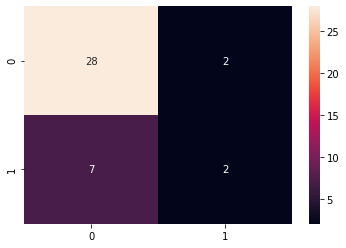

In [203]:
# Appllying RANDOM FOREST CLASSIFIER
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(x_valid)

print("Training Accuracy: ", model_rf.score(x_train, y_train))
print('Testing Accuarcy: ', model_rf.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

y_pred = model_rf.predict(x_test)


In [204]:

#Prepare our Submission file
my_submission = pd.DataFrame({'Application ID':Application_id, 'default_status':y_pred})
my_submission.to_csv('submission_ayanlola.csv', index=False)

ValueError: ignored